In [8]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 878, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 878 (delta 68), reused 100 (delta 64), pack-reused 768
Receiving objects: 100% (878/878), 62.91 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (573/573), done.
Checking out files: 100% (413/413), done.


In [2]:
!pip uninstall rpy2 -y

In [3]:
!pip install rpy2==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rpy2-3.0.0.tar.gz (117 kB)
  Using cached simplegeneric-0.8.1.zip (12 kB)
  Created wheel for rpy2: filename=rpy2-3.0.0-py3-none-any.whl size=106517 sha256=44ed1debf24367cd4cd35542076b431f2dec9ce56de02ae0c0a2b4db72408c20
  Stored in directory: /root/.cache/pip/wheels/df/45/13/31fdd98bad78237ff5322ae817f3cafa7b81dcdc4392305be6
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5078 sha256=83f2fd740bcf0996f0b72e31a9db5e8c224237d2d94afe244acf0ae379b3bbf7
  Stored in directory: /root/.cache/pip/wheels/0b/32/6b/5f5447909a062da20dfe432fa945d8f98636692637deccaa8a
Successfully built rpy2 simplegeneric


In [9]:
%%R
?glm.fit

File: /tmp/RtmpRjXrCB/Rtxt28730696530
glm                   package:stats                    R Documentation



_F_i_t_t_i_n_g _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s



_D_e_s_c_r_i_p_t_i_o_n:



     ‘glm’ is used to fit generalized linear models, specified by

     giving a symbolic description of the linear predictor and a

     description of the error distribution.



_U_s_a_g_e:



     glm(formula, family = gaussian, data, weights, subset,

         na.action, start = NULL, etastart, mustart, offset,

         control = list(...), model = TRUE, method = "glm.fit",

         x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, ...)

     

     glm.fit(x, y, weights = rep.int(1, nobs),

             start = NULL, etastart = NULL, mustart = NULL,

             offset = rep.int(0, nobs), family = gaussian(),

             control = list(), intercept = TRUE, singular.ok = TRUE)

     

     ## S3 method for class 'glm'

 

#Logit

In [11]:
%%R

incump="RiesgosFinancieros/2020-2/Insumos/base_inc.csv"

data=read.csv(incump, sep=",", quote="/")

print(head(data))

colors <- c("red", "blue", "darkgreen", "gold", "black")
attach(data)
n<-nrow(data)-1
m=ncol(data)
x=data[,3:m]
y=data[,2]
ylogr = glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper , family=binomial("logit"))
print(ylogr)
xext=as.matrix(cbind(1,x))
print(head(xext))
summary(ylogr)


  Cliente Incump   Liquid   Apalanc    AscCl       Rentab Bancos    PCP_CT
1       1      0 1.418983 0.3678430 5.519115  0.082436996      2 0.9578792
2       2      0 1.095459 0.6742535 5.365984  0.050120498      3 0.7856872
3       3      0 1.232216 0.8788182 6.579059  0.047376582      1 0.6682592
4       4      0 1.112399 0.6111619 3.980561 -0.010216081      2 0.9324931
5       5      0 1.495808 0.2262790 5.861760  0.002987486      4 0.5764472
6       6      0 1.106524 0.7106344 6.710337  0.046598640      3 0.7644960
     Gop_SD RetrTMP    PLP_PT IFAudit      UO_VN AnOper
1 0.9619346       1 0.4255506       1 0.16267763      4
2 0.8832112       1 0.3777689       0 0.20572504      4
3 1.1103575       1 0.5652263       0 0.23805917      4
4 1.0153539       1 0.3970641       1 0.17857237      5
5 0.9057852       1 0.4313102       0 0.08164283      6
6 1.0523312       0 0.3734093       1 0.24602347      4

Call:  glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT 

In [12]:
%%R
#Réplica de Devianza
print(ylogr$coef)
Llogit=log(prod(((1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^y*(1-(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^(1-y)))
DLogit=-2*Llogit
print(DLogit)

print(ylogr$dev)


(Intercept)      Liquid     Apalanc       AscCl      Rentab      Bancos 
  86.096523  -35.347612   63.663052   -7.861229 -395.215718    8.518809 
     PCP_CT      Gop_SD     RetrTMP      PLP_PT     IFAudit       UO_VN 
  47.308495  -73.760760   -9.272432 -102.053079   16.038037 -124.528160 
     AnOper 
  -3.374335 
[1] 1.310612e-08
[1] 1.310611e-08


[1] "Matriz de confusiÃ³n"
   
y     0   1
  0 126   0
  1   0 121


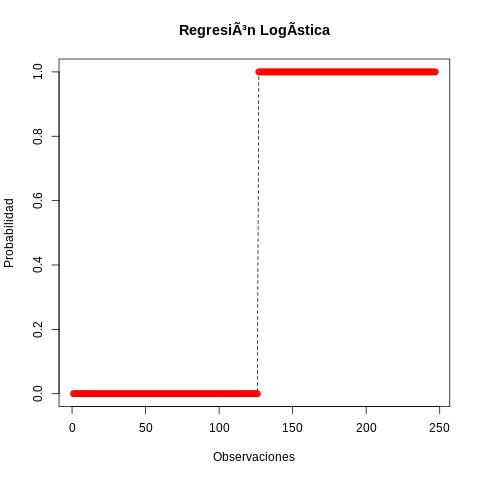

In [13]:
%%R

ptol=0.5
yest=(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Logística")
points(yest, lwd=2, col=colors[1])



#Probit

In [14]:
%%R
yprobr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper, family=binomial("probit"))
yprobr
summary(yprobr)


Call:
glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT + Gop_SD + RetrTMP + PLP_PT + IFAudit + UO_VN + AnOper, 
    family = binomial("probit"))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.926e-05  -2.100e-08  -2.100e-08   2.100e-08   4.848e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.471e+01  9.547e+04   0.000    1.000
Liquid      -1.026e+01  2.310e+04   0.000    1.000
Apalanc      1.835e+01  2.157e+04   0.001    0.999
AscCl       -2.292e+00  5.684e+03   0.000    1.000
Rentab      -1.131e+02  2.929e+05   0.000    1.000
Bancos       2.413e+00  1.575e+04   0.000    1.000
PCP_CT       1.390e+01  3.383e+04   0.000    1.000
Gop_SD      -2.059e+01  3.389e+04  -0.001    1.000
RetrTMP     -2.470e+00  3.524e+04   0.000    1.000
PLP_PT      -2.985e+01  1.296e+05   0.000    1.000
IFAudit      4.724e+00  8.143e+03   0.001    1.000
UO_VN       -3.906e+01  2.158e+05   0.000    1.000
AnOper

In [15]:
%%R
#Comprobación de devianza
print(yprobr$coef)
Lprobit=log(prod((pnorm(xext%*%as.matrix(yprobr$coef),0,1))^y*(1-pnorm(xext%*%as.matrix(yprobr$coef),0,1))^(1-y)))
Dprobit=-2*Lprobit

print(Dprobit)
print(yprobr$dev)


 (Intercept)       Liquid      Apalanc        AscCl       Rentab       Bancos 
  24.7127629  -10.2636723   18.3518939   -2.2920938 -113.1226201    2.4129901 
      PCP_CT       Gop_SD      RetrTMP       PLP_PT      IFAudit        UO_VN 
  13.9003856  -20.5925049   -2.4704686  -29.8456574    4.7245225  -39.0648941 
      AnOper 
  -0.9761072 
[1] 1.276503e-08
[1] 1.276513e-08


[1] "Matriz de confusiÃ³n"
   
y     0   1
  0 126   0
  1   0 121


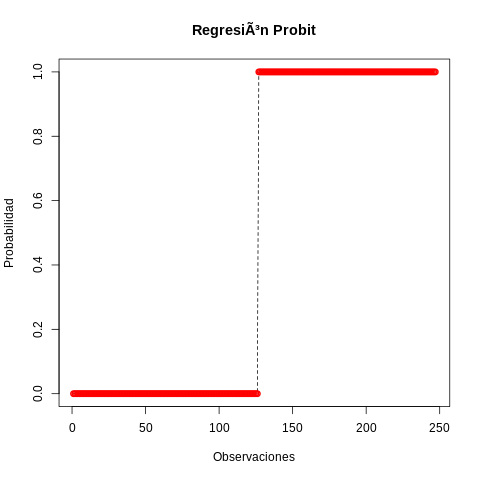

In [16]:
%%R

ptol=0.5
yest=pnorm(xext%*%as.matrix(yprobr$coef),0,1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Probit")
points(yest, lwd=2, col=colors[1])
